This notebook reproduces plotting Fig. 5.

In [1]:
import time    
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
plt.rcParams["font.size"] = 8

import seaborn as sns
sns.set_style('whitegrid', {'grid.color': '0.9'})

In [2]:
# load lambdas and mean predicted fitnesses of test sequence distributions
d = np.load('../aav/models/constrained_maxent_parameters.npz')

# note that lambda in bioRxiv above corresponds to 1 / lambda for us
lambda_l = (1 / d['temperature_l']).astype(int)
meanpredfit_l = d['meanpredfit_l']

In [3]:
# load coverage and sizes of randomized staircase confidence sets (constructed in aav-experiments.ipynb)
fname = '../aav/randomized-staircase-results.npz'
d = np.load(fname, allow_pickle='True')
cov_lxt = d['cov_lxt'].item()
avglen_lxt = d['avglen_lxt']
fracinf_lxt = d['fracinf_lxt']
len_lxt = d['len_lxt'].item()
fit_lxt = d['fit_lxt'].item()

In [4]:
# compute mean empirical coverage and mean true fitness per lambda
n_lambda, n_trial = lambda_l.size, 500 
cov_l = np.zeros([n_lambda])
truefit_l = np.zeros([n_lambda])
for l in range(n_lambda):
        cov_l[l] = np.mean([np.mean(cov_lxt[(l, t)]) for t in range(n_trial)])
        truefit_l[l] = np.mean([np.mean(fit_lxt[(l, t)]) for t in range(n_trial)])

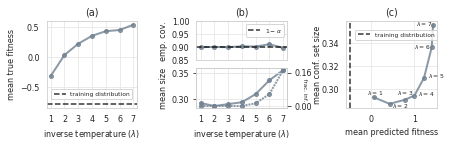

In [67]:
# plot Fig. 5
save_fig = True
fname = '../figures/060822/fig5-aav.pdf'
cmain = 'slategray'

# single-column width: 3.42 inches or 8.7 cm
# double-column width: 7 inches or 17.8 cm
# maximum height: 8.85 inches or 22.5 cm
# small: approx 9 cm x 6 cm (3.54 x 2.36 in)
# medium: approx 11 cm x 11 cm (4.33 in)
# large: approx 18 cm x 22 cm (7 x 8.66 in)
fig = plt.figure(figsize=(7, 1.6))
gs1 = gridspec.GridSpec(1, 3, figure=fig, wspace=0.65)
gs2 = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=gs1[1], hspace=0.2)
ax1 = plt.subplot(gs1[0])
ax21 = plt.subplot(gs2[0])
ax22 = plt.subplot(gs2[1])
ax3 = plt.subplot(gs1[2])

# ===== true fitness =====

nnkmeanfitness = -0.7716402509409155
ax1.plot(lambda_l, truefit_l, '-ob', linewidth=2, markersize=4, alpha=0.8, c=cmain, label='__nolegend__');
ax1.axhline(nnkmeanfitness, linestyle="--", alpha=0.8,
            color='k', label=r'training distribution')
ax1.set_xticks(lambda_l);
ax1.set_xticklabels(lambda_l);
ax1.set_ylabel('mean true fitness')
ax1.set_xlabel(r'inverse temperature ($\lambda$)')
ax1.legend(fontsize=6, loc=(0.05, 0.1));
ax1.set_title('(a)')

# ===== coverage =====

ax21.plot(lambda_l, cov_l, '-o', linewidth=2, markersize=4,  alpha=0.8, c=cmain, label='__nolegend__');
ax21.set_ylabel('emp. cov.');
ax21.set_xticklabels([])
ax21.set_ylim([0.85, 1]);
ax21.set_yticks([0.85, 0.9, 0.95, 1])
ax21.set_xticks(lambda_l);
ax21.axhline(0.9, linestyle='--', alpha=0.8, c='k', label=r'$1 - \alpha$');
ax21.legend(fontsize=6)
ax21.set_title('(b)')

# ===== confidence set sizes =====
fmax = 8.798749497001769
fmin = -7.530085215864544
frange = fmax - fmin

navglen_lxt = avglen_lxt / frange  # report average size as fraction of total range of fitness values
navglen_l = np.nanmean(navglen_lxt, axis=1)
ax22.plot(lambda_l, navglen_l, '-o', linewidth=2, markersize=4, alpha=0.8, c=cmain);
ax22.set_ylabel('mean size');
ax22.set_xticks(lambda_l);
ax22.set_xticklabels(lambda_l);
ax22.set_xlabel(r'inverse temperature ($\lambda$)')

# fraction of confidence sets with infinite size
ax22inf = ax22.twinx()
ax22inf.plot(lambda_l, np.mean(fracinf_lxt, axis=1), '--o', dashes=(1, 0.5),  linewidth=2, markersize=4, alpha=0.8, c=cmain);
ax22inf.set_ylabel('  frac. inf.', fontsize=5.5, rotation=270, labelpad=-5);
ax22inf.set_yticks([0, 0.16]);


# ===== trade-off with certainty =====

nnkmeanpredfit = -0.4723137617111206  # computed in aav-experiments
ax3.plot(meanpredfit_l, navglen_l, '-o',  linewidth=2, markersize=4, alpha=0.8, c=cmain);
ax3.set_xlabel('mean predicted fitness');
ax3.set_ylabel('mean conf. set size', labelpad=-0.1);
ax3.set_title('(c)');
ax3.axvline(nnkmeanpredfit, linestyle="--", alpha=0.8, color='k', label='training distribution')
ax3.legend(fontsize=6, loc=(0.1, 0.78));

xoff = [-0.15, 0.06, -0.18, 0.08, 0.08, -0.4, -0.4]
yoff = [0.002, -0.003, 0.004, 0, 0, -0.001, -0.001]
for l, lmbda in enumerate(lambda_l):
    ax3.annotate(r'$\lambda = {}$'.format(lmbda),
                 (meanpredfit_l[l] + xoff[l], navglen_l[l] + yoff[l]), fontsize=6)

if save_fig:
    plt.savefig(fname, dpi=300, bbox_inches='tight')